In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
x_data = np.genfromtxt('data/xvalsSine.csv')
y_data = np.genfromtxt('data/cleanSine.csv')

In [4]:
np.shape(y_data)

(1000,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [6]:
first_model = LinearRegression().fit(X_train.reshape(-1,1), y_train)
first_pred = first_model.predict(X_test.reshape(-1,1))

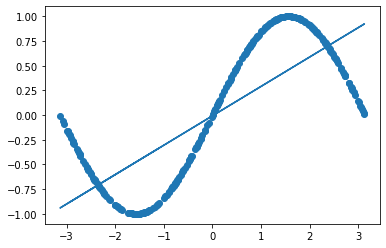

In [7]:
#just first attempt with linear regression 
plt.scatter(X_test, y_test)
plt.plot(X_test, first_pred)

In [8]:
#finding best performance by RMSE
rmselist = []
deg = 1
for i in range(1, 31):
    pol = PolynomialFeatures(degree=i, include_bias = False)
    X_train_new = pol.fit_transform(X_train.reshape(-1,1))
    X_test_new = pol.fit_transform(X_test.reshape(-1,1))
    new_model = LinearRegression().fit(X_train_new, y_train)
    y_pred_new = new_model.predict(X_test_new)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_new))
    
    if len(rmselist) == 0:
        min_rmse = rmse
    else:
        min_rmse = min(rmselist)
        
    rmselist.append(rmse)
    if rmse <= min_rmse:
        deg = i


In [9]:
deg

15

In [10]:
pol = PolynomialFeatures(degree=15, include_bias = False)
X_train_new = pol.fit_transform(X_train.reshape(-1,1))
X_test_new = pol.fit_transform(X_test.reshape(-1,1))
new_model = LinearRegression().fit(X_train_new, y_train)
y_pred_new = new_model.predict(X_test_new)

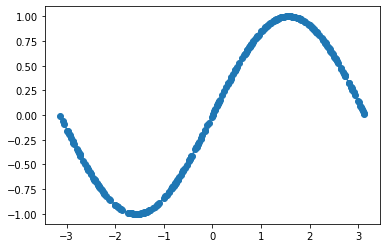

In [11]:
plt.scatter(X_test, y_test)
final_x, final_y = zip(*sorted(zip(X_test, y_pred_new)))
plt.plot(final_x, final_y)